<a href="https://colab.research.google.com/github/heinthuhtet404/machine-learning/blob/main/Linear_Regression_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np

def load_data():
  data = np.loadtxt("/content/ex1data1.txt", delimiter = ',')
  X = data[:,0]
  y = data[:,1]
  return X,y

def load_data_multi():
  data = np.loadtxt("/content/ex1data2.txt", delimiter = ',')
  X = data[:,:2]
  y = data[:,2]
  return X,y

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [24]:
x_train, y_train = load_data()

In [25]:
#print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are :\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are :
 [5.3002 4.8911 7.9832 6.7123 5.2145]


In [26]:
#print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are :\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are :
 [16.1257  8.7324 14.0285 12.5519  7.3928]


In [27]:
print("The shape of x_trian is : ", x_train.shape)
print("The shape of y_train is : ", y_train.shape)
print("Number of training examples (m) : ", len(x_train))

The shape of x_trian is :  (109,)
The shape of y_train is :  (109,)
Number of training examples (m) :  109


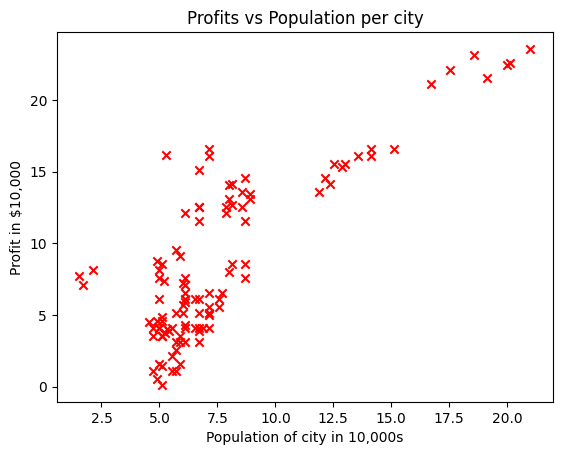

In [28]:
#Create a scatter plot of the data. To change the markers to red "x"
#we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker="x", c="r")

#Set the title
plt.title("Profits vs Population per city")

#Set the x-axis label
plt.xlabel("Population of city in 10,000s")

#Set the y-axis label
plt.ylabel("Profit in $10,000")

plt.show()

In [29]:
#UNQ_C1
#GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b):

  #number of training examples
  m = x.shape[0]

  #You need to return this variable correctly
  total_cost = 0

  ###START CODE HERE###
  fwb = np.zeros((m,1))
  cost = np.zeros((m,1))

  for i in range(m):

    fwb[i] = w*x[i] + b
    cost[i] = (fwb[i] - y[i]) ** 2

  total_cost = np.sum(cost)/(2*m)

  ###END CODE HERE###

  return total_cost

In [30]:
#Compute cost with some initial values for parameters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost: 3f}')

<class 'numpy.float64'>
Cost at initial w:  39.673171


In [31]:
#UNC_C2
#GRADED FUNCTION: compute_gradient

def compute_gradient(x, y, w, b):

  #Number of training examples
  m = x.shape[0]

  #You need to return the following variables correctly
  dj_dw = 0
  dj_db = 0

  ###START CODE HERE###
  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = (f_wb - y[i])
    dj_dw += dj_dw_i
    dj_db += dj_db_i

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  ###END CODE HERE###
  return dj_dw,dj_db


In [32]:
#Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b  (zeros) : ', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b  (zeros) :  -84.10323414284402 -8.605754128440367


In [33]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b: ', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b:  -67.87362185176147 -6.874005871559633


In [34]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

  #number of training examples
  m = len(x)

  #An array to store cost J and w's at each iteratoin - primarily for graphing later
  J_history = []
  w_history = []
  w = copy.deepcopy(w_in) #avoid modifying global w within fuction
  b = b_in

  for i in range(num_iters):

    #Calculate the gradient and update the parameters
    dj_dw, dj_db = gradient_function(x, y, w, b)

    #Update the parameter using w, b, alpha and gradient
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    #Save cost J at each iteration
    if i<100000:  #prevent resource exhaustion
      cost = cost_function(x, y, w, b)
      J_history.append(cost)

    #Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_iters/10) == 0:
      w_history.append(w)
      print(f'Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ')

  return w, b , J_history, w_history #return w and J,w history for graphing



In [35]:
#initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

#some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent : ", w, b)

Iteration    0: Cost     8.76 
Iteration  150: Cost     5.55 
Iteration  300: Cost     5.53 
Iteration  450: Cost     5.52 
Iteration  600: Cost     5.51 
Iteration  750: Cost     5.51 
Iteration  900: Cost     5.50 
Iteration 1050: Cost     5.50 
Iteration 1200: Cost     5.50 
Iteration 1350: Cost     5.50 
w,b found by gradient descent :  1.2218618234287495 -0.7431383487779263


In [36]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
  predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of city in 10,000s')

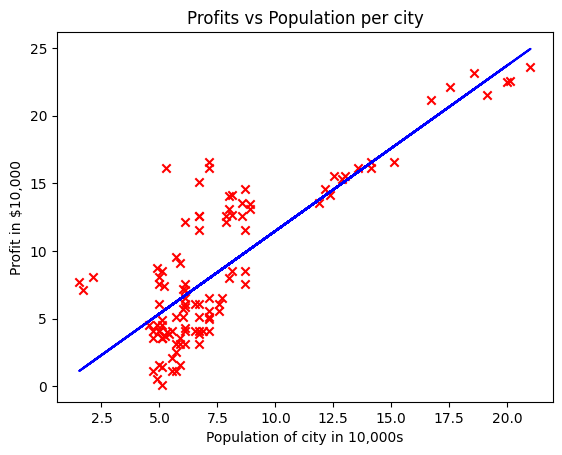

In [37]:
#Plot the linear fit
plt.plot(x_train, predicted, c = "b")

#Create a scatter plot of the data
plt.scatter(x_train, y_train, marker='x', c='r')

#Set the title
plt.title("Profits vs Population per city")

#Set the y-axis label
plt.ylabel("Profit in $10,000")

#Set the x-axis label
plt.xlabel("Population of city in 10,000s")

In [38]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1 * 10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2 * 10000))

For population = 35,000, we predict a profit of $35333.78
For population = 70,000, we predict a profit of $78098.94
